In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Read and clean data

In [18]:
df = pd.read_csv('../../../Data/Real Estate/Real Estate Data.csv', index_col=0, header=0)
df = df.reset_index(drop=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      1404 non-null   object 
 1   Zoning Class              1404 non-null   object 
 2   Lot Frontage              1151 non-null   float64
 3   Lot Area                  1404 non-null   int64  
 4   Alley                     84 non-null     object 
 5   Lot Shape                 1404 non-null   object 
 6   Land Contour              1404 non-null   object 
 7   Lot Config                1404 non-null   object 
 8   Land Slope                1404 non-null   object 
 9   Nbhd                      1404 non-null   object 
 10  Location Condition        1404 non-null   object 
 11  Bldg Type                 1404 non-null   object 
 12  House Style               1404 non-null   object 
 13  OvQual                    1404 non-null   int64  
 14  Overall 

,Type,Zoning Class,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Nbhd,Location Condition,Bldg Type,House Style,OvQual,Overall Cond,Built,Year Remod Add,Roof Style,Roof Material,Exterior Primary,Masonry/Veneer,Masonry/Veneer Area,Exterior Qual,Exterior Cond,Foundation,Basement Height,Basement Cond,Basement Exposure,Basement Finish,Basement Finished Area,Basement Unfinished Area,Basement Area,Heating Qual,CentralAir,Electrical,1st Floor Area,2nd Floor Area,Living Area Above Grade,Basement Full Baths,Basement Half baths,Full Baths Above Grade,Half Baths Above Grade,Bedrooms Above Grade,Kitchens Above Grade,Kitchen Qual,Total Rooms Above Grade,Functionality,Fireplaces,Fireplce Qual,Garage Type,Garage Yr Built,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck Area,Open Porch Area,Enclosed Porch Area,3 Season Porch Area,Screen Porch Area,Pool Area,Pool Qual,Fence,Sale Type,Sale Condition,Sale Price
0,2-STORY 1946 & NEWER,Resid Low Density,65.0,8450,NaN,Regular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2003,2003,Gable,Composite Shingle,Vinyl Siding,Brick Face,196.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,No Exposure,Good Living Quarters,706,150,856,Excellent,Y,Standard Circuit Breakers & Romex,856,854,1710,1,0,2,1,3,1,Good,8,Typical Functionality,0,No Fireplace,Attached to home,2003.0,Rough Finished,2,548,Average,Average,Paved,0,61,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,208500
1,1-STORY 1946 & NEWER,Resid Low Density,80.0,9600,NaN,Regular,Level,Frontage on 2 sides,Gentle,Veenker,Adjacent Feeder St,1-family Detached,1 story,6,8,1976,1976,Gable,Composite Shingle,Metal Siding,NaN,0.0,Average,Average,Cinder Block,"Good (90-99"")",Average,Good Exposure,Avg Living Quarters,978,284,1262,Excellent,Y,Standard Circuit Breakers & Romex,1262,0,1262,0,1,2,0,3,1,Average,6,Typical Functionality,1,Average,Attached to home,1976.0,Rough Finished,2,460,Average,Average,Paved,298,0,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,181500
2,2-STORY 1946 & NEWER,Resid Low Density,68.0,11250,NaN,Slightly irregular,Level,Inside lot,Gentle,College Creek,Normal,1-family Detached,2 story,7,5,2001,2002,Gable,Composite Shingle,Vinyl Siding,Brick Face,162.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Min Exposure,Good Living Quarters,486,434,920,Excellent,Y,Standard Circuit Breakers & Romex,920,866,1786,1,0,2,1,3,1,Good,6,Typical Functionality,1,Average,Attached to home,2001.0,Rough Finished,2,608,Average,Average,Paved,0,42,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,223500
3,2-STORY 1945 & OLDER,Resid Low Density,60.0,9550,NaN,Slightly irregular,Level,Corner lot,Gentle,Crawford,Normal,1-family Detached,2 story,7,5,1915,1970,Gable,Composite Shingle,Wood Siding,NaN,0.0,Average,Average,Brick & Tile,"Typical (80-89"")",Good,No Exposure,Avg Living Quarters,216,540,756,Good,Y,Standard Circuit Breakers & Romex,961,756,1717,1,0,1,0,3,1,Good,7,Typical Functionality,1,Good,Detached from home,1998.0,Unfinished,3,642,Average,Average,Paved,0,35,272,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,"Abnormal Sale - trade, foreclosure, short sale",140000
4,2-STORY 1946 & NEWER,Resid Low Density,84.0,14260,NaN,Slightly irregular,Level,Frontage on 2 sides,Gentle,Northridge,Normal,1-family Detached,2 story,8,5,2000,2000,Gable,Composite Shingle,Vinyl Siding,Brick Face,350.0,Good,Average,Poured Contrete,"Good (90-99"")",Average,Avg Exposure,Good Living Quarters,655,490,1145,Excellent,Y,Standard Circuit Breakers & Romex,1145,1053,2198,1,0,2,1,4,1,Good,9,Typical Functionality,1,Average,Attached to home,2000.0,Rough Finished,3,836,Average,Average,Paved,192,84,0,0,0,0,No Pool,No Fence,Warranty Deed - Conventional,Normal Sale,250000


In [21]:
df = df.rename(columns = {'OvQual':'Overall Qual',
                          'Built':'Year',
                          'Garage Yr Built':'Year Garage'})

df = df.drop(columns=['Alley'])
df = df.drop(columns=['Masonry/Veneer'])

In [22]:
gb1 = df.groupby(["Nbhd"])['Lot Frontage'].median().sort_values()

def fill_1(r):
    n = r.Nbhd
    
    x = r['Lot Frontage']
    
    if pd.isna(x):
        return gb1[n]
    else:
        return x
    # end
# end

df['Lot Frontage'] = df.apply(fill_1, axis=1)

In [23]:
gb2 = df.groupby(["Nbhd"])['Year Garage'].median().sort_values()

def fill_2(r):
    n = r.Nbhd
    
    x = r['Year Garage']
    
    if pd.isna(x):
        return gb2[n]
    else:
        return x
    # end
# end

df['Year Garage'] = df.apply(fill_2, axis=1)

In [24]:
gb3 = df.groupby(["Nbhd"])['Masonry/Veneer Area'].median().sort_values()

def fill_3(r):
    n = r.Nbhd
    
    x = r['Masonry/Veneer Area']
    
    if pd.isna(x):
        return gb2[n]
    else:
        return x
    # end
# end

df['Masonry/Veneer Area'] = df.apply(fill_3, axis=1)

# Feature engineering

### Floors

In [25]:
def get_floors(x):
    if x > 0:
        return 2
    else:
        return 1
    # end
# end

df['Floors'] = df['2nd Floor Area'].apply(get_floors)

### Areas

In [27]:
df.columns[df.columns.str.contains("Area")].sort_values()

Index(['1st Floor Area', '2nd Floor Area', '3 Season Porch Area',
       'Basement Area', 'Basement Finished Area', 'Basement Unfinished Area',
       'Enclosed Porch Area', 'Garage Area', 'Living Area Above Grade',
       'Lot Area', 'Masonry/Veneer Area', 'Open Porch Area', 'Pool Area',
       'Screen Porch Area', 'Wood Deck Area'],
      dtype='object')

<AxesSubplot:>

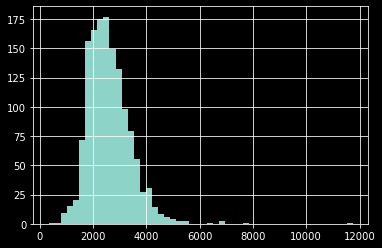

In [28]:
df['Indoor Area'] = df[
    [
        '1st Floor Area', '2nd Floor Area', 'Basement Area'
    ]
].sum(axis=1)

df['Indoor Area'].hist(bins=50)

<AxesSubplot:>

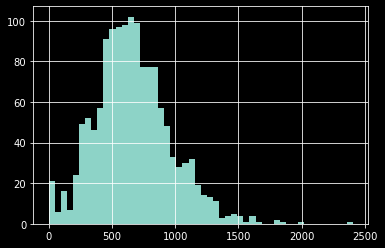

In [29]:
df['Outdoor Area'] = df[
    [
        '3 Season Porch Area', 'Enclosed Porch Area', 'Garage Area',
        'Open Porch Area', 'Pool Area', 'Screen Porch Area', 'Wood Deck Area'
    ]
].sum(axis=1)

df['Outdoor Area'].hist(bins=50)

### Basement finished area fraction

In [30]:
df['Basement Finished Area Fraction'] = df['Basement Finished Area'] / df[['Basement Finished Area', 'Basement Unfinished Area']].sum(axis=1)
df['Basement Finished Area Fraction'] = df['Basement Finished Area Fraction'].fillna(0)
df['Basement Finished Area Fraction']

0       0.824766
1       0.774960
2       0.528261
3       0.285714
4       0.572052
          ...   
1399    0.000000
1400    0.572879
1401    0.238715
1402    1.000000
1403    0.859213
Name: Basement Finished Area Fraction, Length: 1404, dtype: float64

In [31]:
df = df.drop(
    columns=[
       '1st Floor Area', '2nd Floor Area', '3 Season Porch Area',
       'Basement Area', 'Basement Finished Area', 'Basement Unfinished Area',
       'Enclosed Porch Area', 'Garage Area', 'Living Area Above Grade',
       'Open Porch Area', 'Pool Area', 'Screen Porch Area', 'Wood Deck Area'
    ]
)

### Label encode qualities

In [32]:
from sklearn.preprocessing import OrdinalEncoder

# Define known categories
quality_order = ["Poor", "Fair", "Average", "Good", "Excellent"]

# Identify categorical columns that contain 'Average'
cols = df.columns[df.isin(['Average']).any(axis=0)]

# Replace unknown values with "Poor"
df[cols] = df[cols].applymap(lambda x: x if x in quality_order else "Poor")

# Initialize and fit OrdinalEncoder on a single-column DataFrame
encoder = OrdinalEncoder(
    categories=[quality_order]
)

encoder.fit(
    np.array(quality_order)[:,np.newaxis]
)

# Transform each column separately in a loop
for c in cols:
    df[c] = encoder.transform(df[[c]]).astype(int)[:,0]
# end

df[cols].head()

,Exterior Qual,Exterior Cond,Basement Cond,Heating Qual,Kitchen Qual,Fireplce Qual,Garage Qual,Garage Cond
0,3,2,2,4,3,0,2,2
1,2,2,2,4,2,2,2,2
2,3,2,2,4,3,2,2,2
3,2,2,3,3,3,3,2,2
4,3,2,2,4,3,2,2,2


In [33]:
df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x.split(" ")[0]
)

df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x if x != "Typical" else "Average"
)

df['Basement Height'] = df['Basement Height'].apply(
    lambda x: x if x in quality_order else "Poor"
)

df['Basement Height'] = encoder.transform(df[['Basement Height']]).astype(int)[:,0]
df['Basement Height'].head()

0    3
1    3
2    3
3    2
4    3
Name: Basement Height, dtype: int32

In [34]:
df['Pool Qual'] = df['Pool Qual'].apply(
    lambda x: x if x in quality_order else "Poor"
)

df['Pool Qual'] = encoder.transform(df[['Pool Qual']]).astype(int)[:,0]
df['Pool Qual'].head()

0    0
1    0
2    0
3    0
4    0
Name: Pool Qual, dtype: int32

### Central Air

In [35]:
df['CentralAir'] = df['CentralAir'].replace(
    {
        'Y':1,
        'N':0
    }
)

df = df.rename(
    columns={
        'CentralAir':'Central Air'
    }
)